In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2e68acf65b24a9415b8a5a9486b7ffa0


In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

2.60941370003178 150.51216590340226
80.4951276908194 -165.17347526211825
-79.23912358099963 -165.65676977281967
-11.4065594275814 -87.21269097987144
-33.20340053685744 -131.660696707518
-40.21434078961685 -120.39971825165642
43.494490734331606 158.50403655927545
10.44655134103256 -90.4320672549124
70.06899262240779 -68.5984425876729
22.95630176741585 -81.58795942710744
-66.67071289416057 18.32925203882877
-24.279679852834136 -50.80880090398347
-66.04349187379363 -134.1134069572424
-84.56748674081382 163.2607380541674
74.61623660399906 -132.6232175188589
87.36313466348278 -134.6882771592911
71.97436916552843 28.007767693194637
34.61751191261318 -53.05889344120956
64.81572320505421 -67.65035647065693
69.2509743205924 -92.687496110816
70.43043870160616 97.61582869023817
30.61530700623254 93.42720857785906
42.88918665824349 17.797239572361264
-32.78237472001775 76.99914875143708
2.4244792055185798 -159.6104073759482
85.79626585283853 -18.340119144644206
-7.631254450951062 -2.27806172609552

In [8]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [10]:
cities

['kavieng',
 'barrow',
 'mataura',
 'pimentel',
 'rikitea',
 'severo-kurilsk',
 'acajutla',
 'clyde river',
 'matanzas',
 'bredasdorp',
 'ortigueira',
 'bluff',
 'tuktoyaktuk',
 'mehamn',
 'saint george',
 'iqaluit',
 'thompson',
 'khatanga',
 'lasa',
 'metkovic',
 'bambous virieux',
 'hilo',
 'illoqqortoormiut',
 'jamestown',
 'victoria',
 'coos bay',
 'vaini',
 'yertarskiy',
 'saskylakh',
 'butaritari',
 'eyl',
 'sakaiminato',
 'ushuaia',
 'guerrero negro',
 'upernavik',
 'narsaq',
 'virginia beach',
 'constitucion',
 'avarua',
 'sola',
 'bulgan',
 'albany',
 'tsihombe',
 'belem',
 'klaksvik',
 'along',
 'vallenar',
 'saint-philippe',
 'esperance',
 'husavik',
 'saint-pierre',
 'temaraia',
 'cape town',
 'barcelos',
 'aripuana',
 'port hardy',
 'kiunga',
 'warqla',
 'mar del plata',
 'coihaique',
 'taolanaro',
 'rawson',
 'caxito',
 'lexington',
 'lensk',
 'nikolskoye',
 'punta arenas',
 'otavi',
 'qaanaaq',
 'sibolga',
 'kranuan',
 'chuy',
 'ternate',
 'kodiak',
 'longyearbyen',
 's

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kavieng
Processing Record 2 of Set 1 | barrow
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | pimentel
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | severo-kurilsk
Processing Record 7 of Set 1 | acajutla
Processing Record 8 of Set 1 | clyde river
Processing Record 9 of Set 1 | matanzas
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | ortigueira
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | tuktoyaktuk
Processing Record 14 of Set 1 | mehamn
Processing Record 15 of Set 1 | saint george
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | khatanga
Processing Record 19 of Set 1 | lasa
Processing Record 20 of Set 1 | metkovic
Processing Record 21 of Set 1 | bambous virieux
Processing Record 22 of Set 1 | hilo
Processing Record 23 of Set 1 | illoqqo

Processing Record 38 of Set 4 | yerbogachen
Processing Record 39 of Set 4 | kinango
Processing Record 40 of Set 4 | bardiyah
Processing Record 41 of Set 4 | cidreira
Processing Record 42 of Set 4 | cap-aux-meules
Processing Record 43 of Set 4 | san andres
Processing Record 44 of Set 4 | east london
Processing Record 45 of Set 4 | yondo
Processing Record 46 of Set 4 | san buenaventura
Processing Record 47 of Set 4 | rethimnon
Processing Record 48 of Set 4 | castro
Processing Record 49 of Set 4 | tautira
Processing Record 50 of Set 4 | kasamwa
Processing Record 1 of Set 5 | talcahuano
Processing Record 2 of Set 5 | mangrol
Processing Record 3 of Set 5 | yershov
Processing Record 4 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 5 of Set 5 | manggar
Processing Record 6 of Set 5 | fuling
Processing Record 7 of Set 5 | hunza
City not found. Skipping...
Processing Record 8 of Set 5 | pemba
Processing Record 9 of Set 5 | ucluelet
Processing Record 10 of Set 5 | kartaly
Pr

Processing Record 24 of Set 8 | saint anthony
Processing Record 25 of Set 8 | ponta do sol
Processing Record 26 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 27 of Set 8 | jishou
Processing Record 28 of Set 8 | tabou
Processing Record 29 of Set 8 | sinnamary
Processing Record 30 of Set 8 | nyurba
Processing Record 31 of Set 8 | plouzane
Processing Record 32 of Set 8 | san jose
Processing Record 33 of Set 8 | neuquen
Processing Record 34 of Set 8 | riverton
Processing Record 35 of Set 8 | caohai
Processing Record 36 of Set 8 | sisimiut
Processing Record 37 of Set 8 | aklavik
Processing Record 38 of Set 8 | goure
Processing Record 39 of Set 8 | nuevo progreso
Processing Record 40 of Set 8 | bethel
Processing Record 41 of Set 8 | aflu
City not found. Skipping...
Processing Record 42 of Set 8 | labuhan
Processing Record 43 of Set 8 | arevashogh
Processing Record 44 of Set 8 | talnakh
Processing Record 45 of Set 8 | gabu
Processing Record 46 of Set 8 | yar-sale
Process

Processing Record 12 of Set 12 | vila velha
Processing Record 13 of Set 12 | bure
Processing Record 14 of Set 12 | binzhou
Processing Record 15 of Set 12 | brockville
Processing Record 16 of Set 12 | mutis
Processing Record 17 of Set 12 | burica
City not found. Skipping...
Processing Record 18 of Set 12 | baykit
Processing Record 19 of Set 12 | naryan-mar
Processing Record 20 of Set 12 | sabha
Processing Record 21 of Set 12 | kouango
Processing Record 22 of Set 12 | gizo
Processing Record 23 of Set 12 | xining
Processing Record 24 of Set 12 | buala
Processing Record 25 of Set 12 | hosingen
Processing Record 26 of Set 12 | namwala
Processing Record 27 of Set 12 | college
Processing Record 28 of Set 12 | bafra
Processing Record 29 of Set 12 | sarab
Processing Record 30 of Set 12 | santa rosa
Processing Record 31 of Set 12 | dalby
Processing Record 32 of Set 12 | havre-saint-pierre
Processing Record 33 of Set 12 | zhezkazgan
Processing Record 34 of Set 12 | bima
Processing Record 35 of Se

In [12]:
len(city_data)

559

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kavieng,-2.5744,150.7967,82.26,72,100,8.50,PG,2022-05-25 21:42:43
1,Barrow,71.2906,-156.7887,33.82,86,20,14.97,US,2022-05-25 21:42:44
2,Mataura,-46.1927,168.8643,41.49,90,23,1.88,NZ,2022-05-25 21:42:44
3,Pimentel,-6.8367,-79.9342,71.89,60,0,18.41,PE,2022-05-25 21:42:45
4,Rikitea,-23.1203,-134.9692,74.95,76,22,4.56,PF,2022-05-25 21:42:45
5,Severo-Kurilsk,50.6789,156.1250,40.35,95,100,7.09,RU,2022-05-25 21:42:45
6,Acajutla,13.5928,-89.8275,82.98,74,96,10.40,SV,2022-05-25 21:42:46
7,Clyde River,70.4692,-68.5914,19.63,93,75,21.85,CA,2022-05-25 21:41:10
8,Matanzas,23.0411,-81.5775,84.96,74,75,13.80,CU,2022-05-25 21:42:46
9,Bredasdorp,-34.5322,20.0403,59.41,92,94,1.88,ZA,2022-05-25 21:42:47


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kavieng,PG,2022-05-25 21:42:43,-2.5744,150.7967,82.26,72,100,8.50
1,Barrow,US,2022-05-25 21:42:44,71.2906,-156.7887,33.82,86,20,14.97
2,Mataura,NZ,2022-05-25 21:42:44,-46.1927,168.8643,41.49,90,23,1.88
3,Pimentel,PE,2022-05-25 21:42:45,-6.8367,-79.9342,71.89,60,0,18.41
4,Rikitea,PF,2022-05-25 21:42:45,-23.1203,-134.9692,74.95,76,22,4.56
5,Severo-Kurilsk,RU,2022-05-25 21:42:45,50.6789,156.1250,40.35,95,100,7.09
6,Acajutla,SV,2022-05-25 21:42:46,13.5928,-89.8275,82.98,74,96,10.40
7,Clyde River,CA,2022-05-25 21:41:10,70.4692,-68.5914,19.63,93,75,21.85
8,Matanzas,CU,2022-05-25 21:42:46,23.0411,-81.5775,84.96,74,75,13.80
9,Bredasdorp,ZA,2022-05-25 21:42:47,-34.5322,20.0403,59.41,92,94,1.88


In [15]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1653518173.3894665

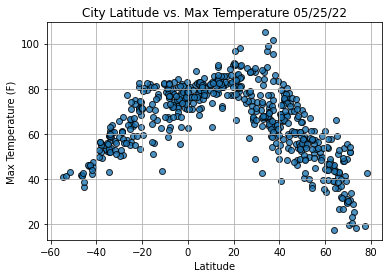

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

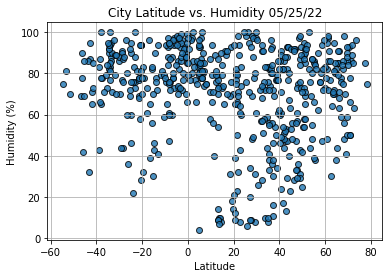

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig2.png")
# Show plot.
plt.show()

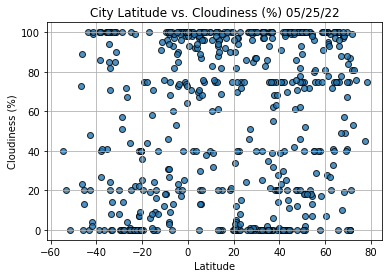

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig3.png")
# Show plot.
plt.show()

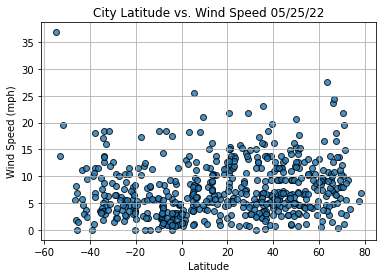

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig4.png")
# Show plot.
plt.show()

In [27]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [28]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Barrow,US,2022-05-25 21:42:44,71.2906,-156.7887,33.82,86,20,14.97
5,Severo-Kurilsk,RU,2022-05-25 21:42:45,50.6789,156.1250,40.35,95,100,7.09
6,Acajutla,SV,2022-05-25 21:42:46,13.5928,-89.8275,82.98,74,96,10.40
7,Clyde River,CA,2022-05-25 21:41:10,70.4692,-68.5914,19.63,93,75,21.85
8,Matanzas,CU,2022-05-25 21:42:46,23.0411,-81.5775,84.96,74,75,13.80


In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

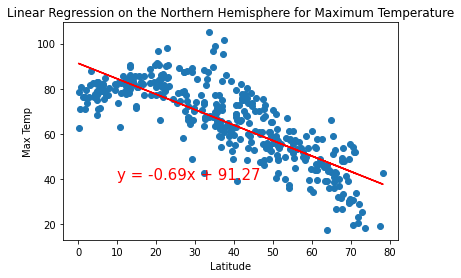

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

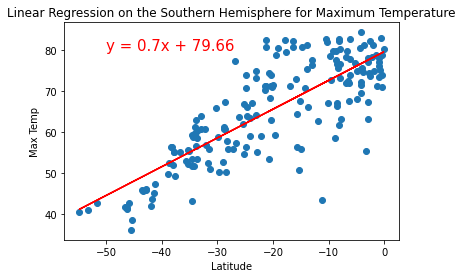

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,80))

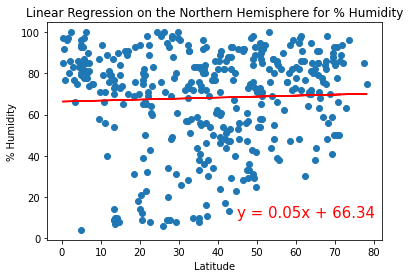

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(45,10))

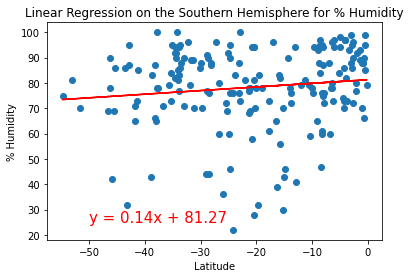

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,25))

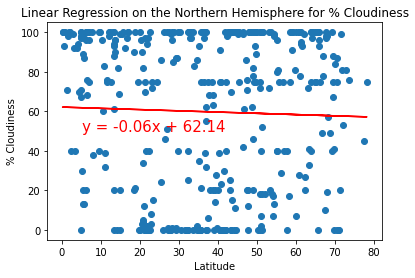

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(5,50))

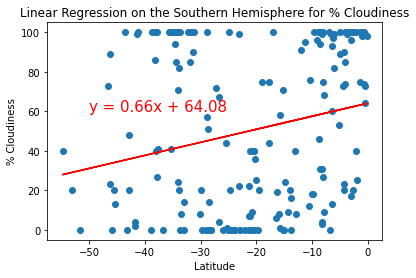

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

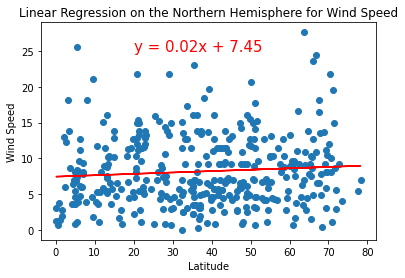

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(20,25))

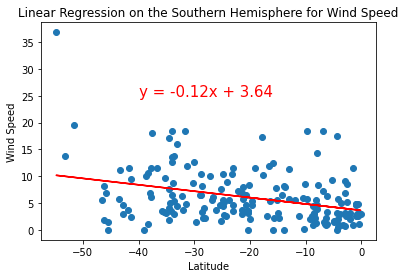

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-40,25))